In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df=pd.read_csv('../input/ecommerce-text-classification/ecommerceDataset.csv',header=None)
df.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


marking the colby below names 

In [4]:
df.columns=['targets','description']

counting the values for each catrgory and checking for class imbalance

In [5]:
df['targets'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: targets, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['targets']=lb.fit_transform(df['targets'])

Encoding the target variables by label encoder

In [7]:
df.head()

,targets,description
0,3,Paper Plane Design Framed Wall Hanging Motivat...
1,3,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,3,SAF 'UV Textured Modern Art Print Framed' Pain...
3,3,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,3,Incredible Gifts India Wooden Happy Birthday U...


In [9]:
df.dropna(inplace=True)

found that only one nan value in the whole dataframe so dropping that entire row

In [10]:
Cloth_and_access=df[df.targets==0].shape[0]
Electronics =df[df.targets==1].shape[0]
Books  =df[df.targets==2].shape[0]
Household  =df[df.targets==3].shape[0]

getting the no.of values for each class

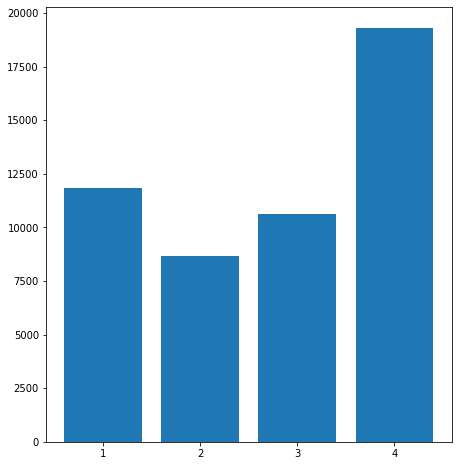

In [11]:
plt.figure(1,figsize=(16,8))
plt.subplot(1,2,1)
_=plt.bar(['1','2','3','4'],[Cloth_and_access,Electronics,Books,Household])

ploting the class distribution of each class.

In [12]:
def plot_target_based_feature(feature):
    x1=df[df.targets==0][feature]
    x2=df[df.targets==1][feature]
    x3=df[df.targets==2][feature]
    x4=df[df.targets==3][feature]
    plt.figure(figsize=(16,16))
    plt.subplot(1,1,1)
    _=plt.hist(x1,alpha=0.5,color='grey',bins=50)
    _=plt.hist(x2,alpha=0.6,color='red',bins=50)
    _=plt.hist(x3,alpha=0.7,color='blue',bins=50)
    _=plt.hist(x4,alpha=0.4,color='green',bins=50)
    
    return _

The above is for  feature based ploting

Generating the new features from the the description of the class is very helpfull for classifying the targets.

In [13]:
df['text_len']=df.description.map(lambda x:len(x))

creating new feature based on length of the each description

plotiing based on text len

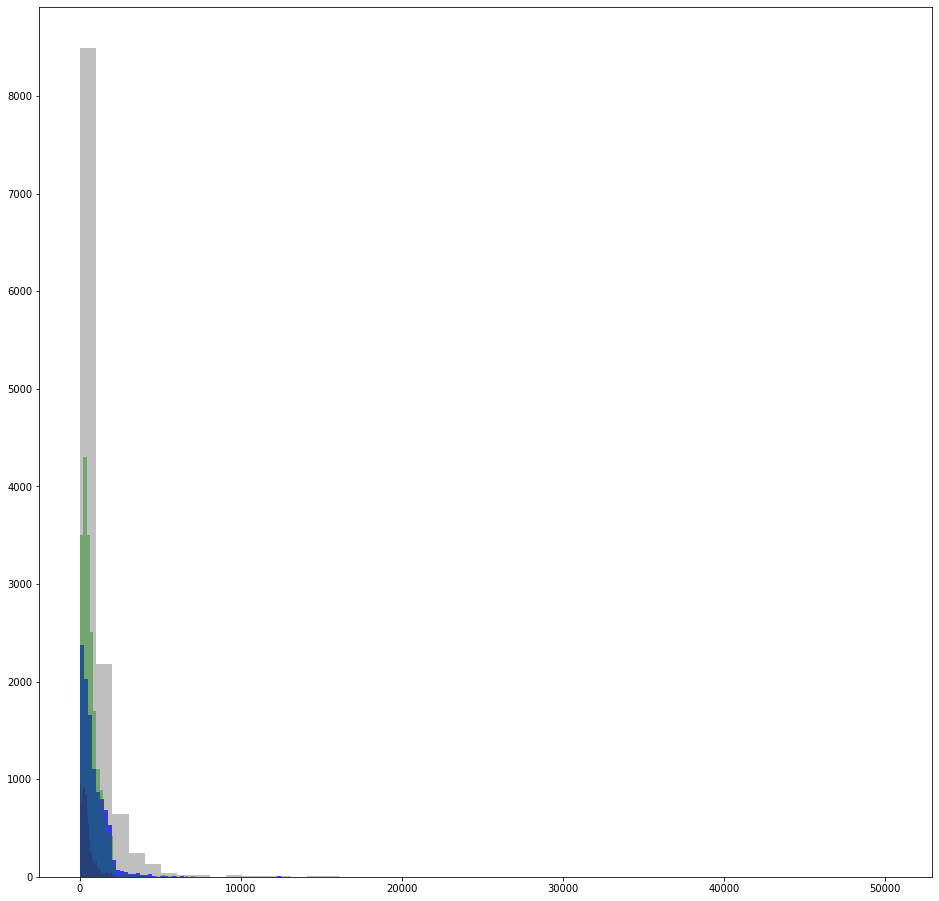

In [14]:
_=plot_target_based_feature('text_len')

plotiing based on words count

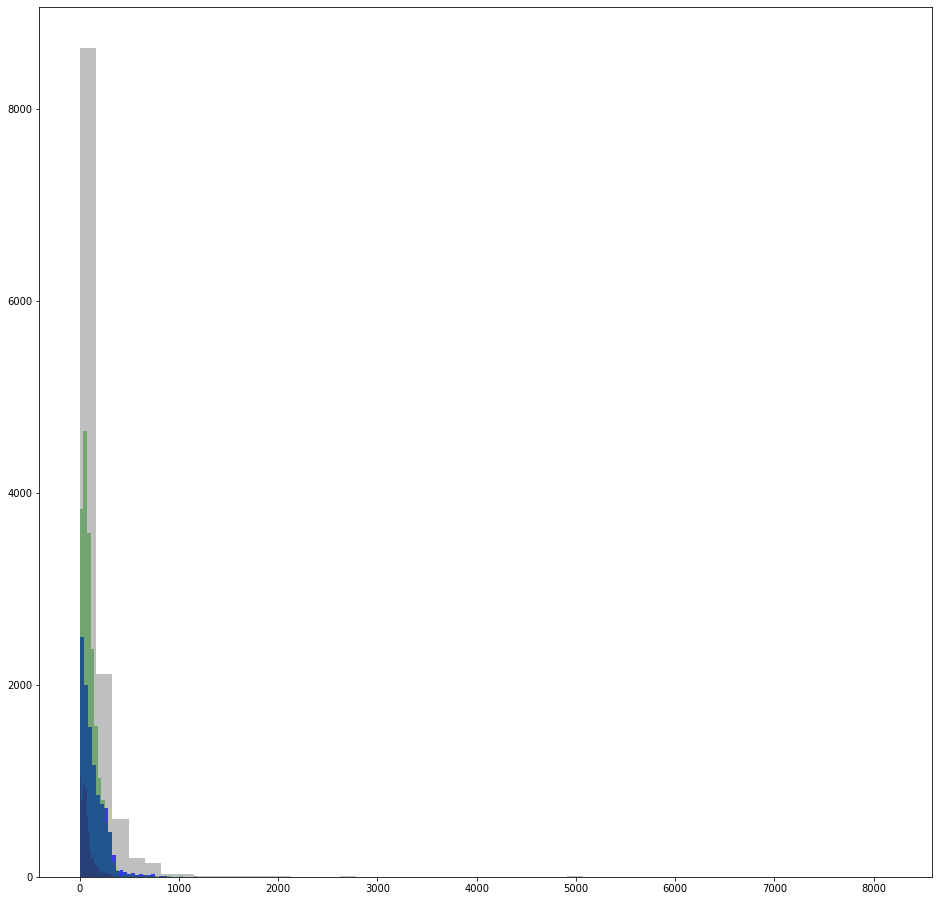

In [15]:
df['word_count']=df.description.str.split().map(lambda x: len(x))
_=plot_target_based_feature('word_count')

creating feature based on no.of words in each description

the correlation is always expected that the no.of words is proportional to length of text

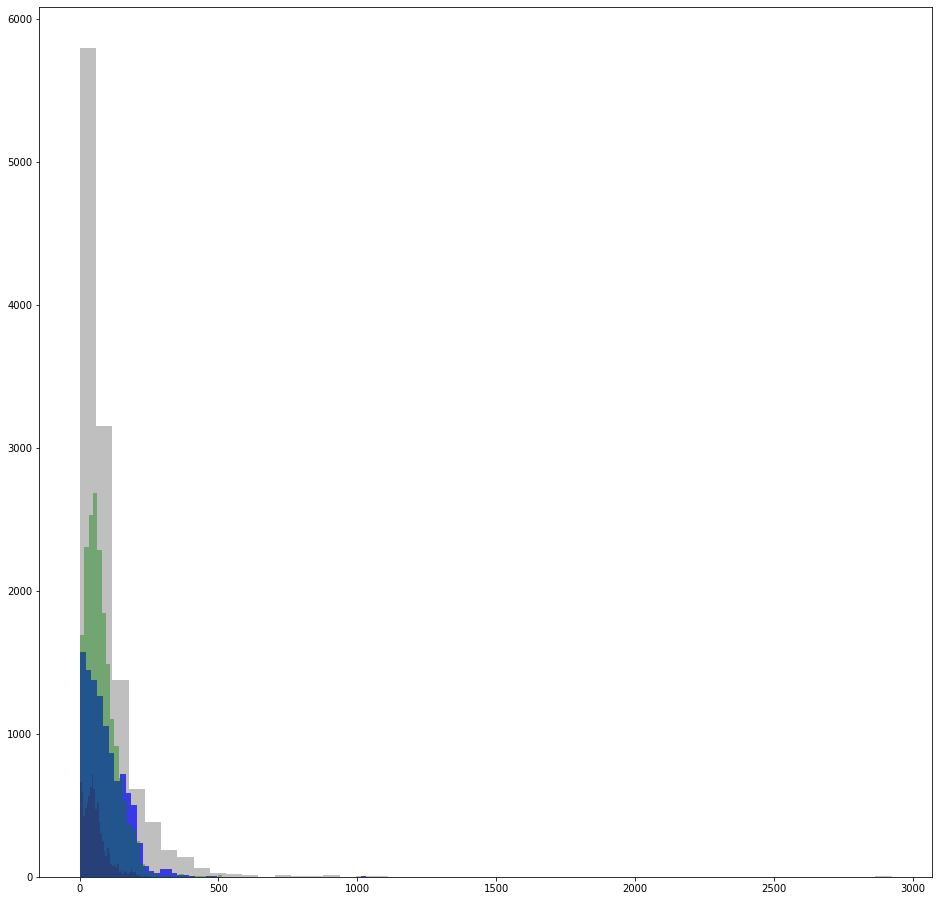

In [16]:
df['unique_words']=df.description.map(lambda x:len(set(str(x).split())))
_=plot_target_based_feature('unique_words')

creating based on no.of unique words in each description

mean word length

In [17]:
df['mean_word_length']=df.description.map(
lambda x:np.mean([len(w) for w in str(x).split()])
)

creating feature based on mean_word_length

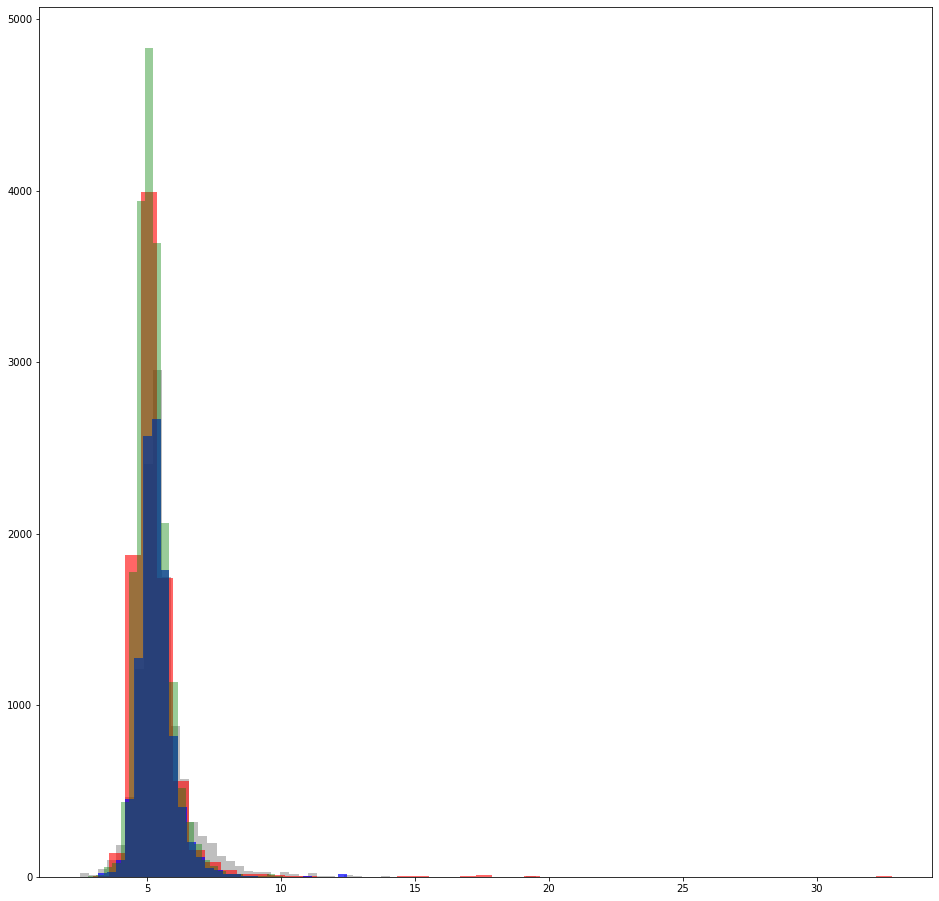

In [18]:
_=plot_target_based_feature('mean_word_length')

In [19]:
import string
df['puncuation_count']=df.description.map(
lambda x:len([c for c in str(x) if c in string.punctuation])
)

creating feature based on puncuations in each description

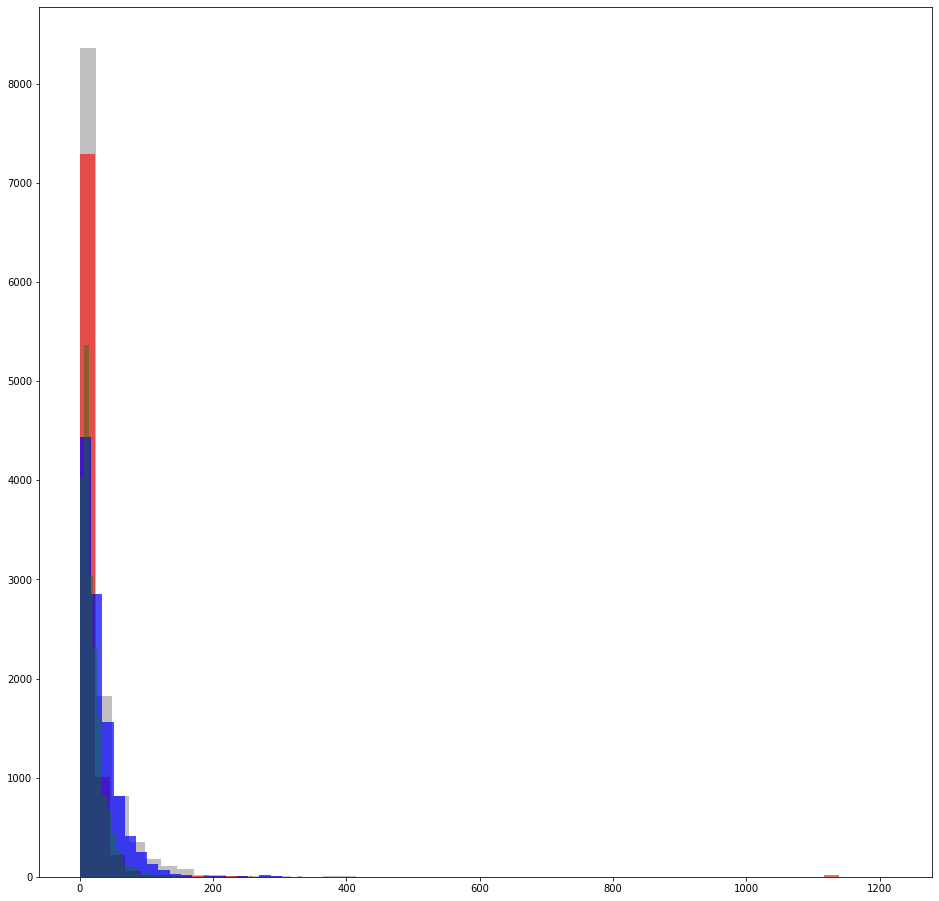

In [20]:
_=plot_target_based_feature('puncuation_count')

for classification using text data 3-gram is recommended

In [21]:
df.head()

,targets,description,text_len,word_count,unique_words,mean_word_length,puncuation_count
0,3,Paper Plane Design Framed Wall Hanging Motivat...,1338,228,158,4.872807,25
1,3,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",346,59,52,4.881356,11
2,3,SAF 'UV Textured Modern Art Print Framed' Pain...,1316,224,133,4.392857,26
3,3,"SAF Flower Print Framed Painting (Synthetic, 1...",1091,184,120,4.342391,22
4,3,Incredible Gifts India Wooden Happy Birthday U...,989,184,120,4.369565,16


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_feat(corpus,ngram=(1,1),nr=None):
    vec=CountVectorizer(ngram_range=ngram).fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
    return words_freq[:nr]

creating customised unigrams using countvectorizer

In [23]:
top_text_bigrams=get_top_feat(df.description,ngram=(2,2),nr=10)


In [24]:
top_text_bigrams

[('of the', 21551),
 ('in the', 13023),
 ('it is', 8972),
 ('you can', 8616),
 ('to the', 8318),
 ('on the', 7815),
 ('can be', 7524),
 ('the author', 7135),
 ('about the', 6870),
 ('easy to', 6620)]

<BarContainer object of 10 artists>

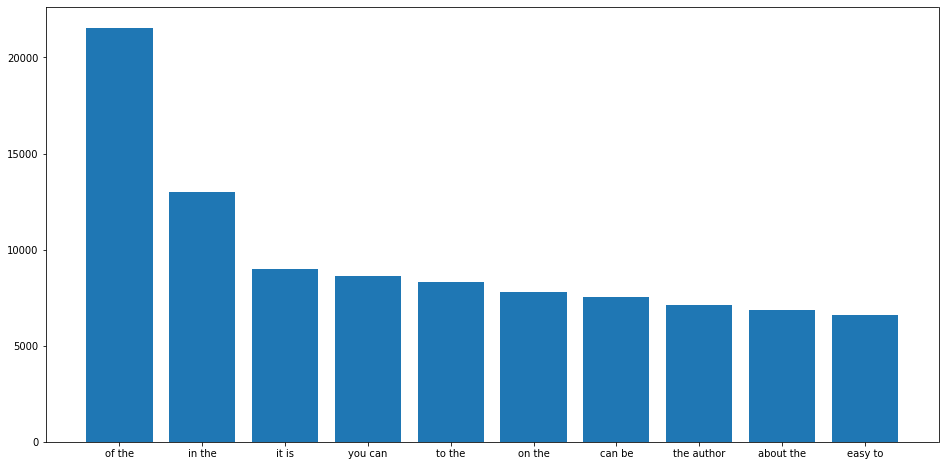

In [25]:
x,y=zip(*top_text_bigrams)#zipping the tuples in the bigrams and unpacking them
plt.figure(1,figsize=(16,8))
plt.subplot(1,1,1)
plt.bar(x,y)

In [26]:
df['kfold']=-1
df=df.sample(frac=1).reset_index(drop=True)# resampling the elements for better model training
y=df.targets.values

In [27]:
from sklearn import model_selection
kf=model_selection.StratifiedKFold(n_splits=int(1+np.log2(len(df))))# struges rule for no.of splits
for f, (t_,v_) in enumerate(kf.split(X=df,y=y)):
    df.loc[v_,'kfold']=f

using kfold cross validation to split into training and test set

In [28]:
df.head()

,targets,description,text_len,word_count,unique_words,mean_word_length,puncuation_count,kfold
0,1,Exotic India Shawl from Kutch with Embroidered...,93,16,15,4.875000,3,0
1,0,Political Theory: An Introduction,34,4,4,7.500000,1,0
2,0,The 5 AM Club: Own Your Morning. Elevate Your ...,516,83,71,5.228916,11,0
3,1,Generic Baby Boys and Baby Girls 10 Toon Desig...,461,80,62,4.775000,6,0
4,1,Bodycare Kids Thermal Set of 1 Lower and 1 Top...,203,35,31,4.828571,4,0


taking only other features instead of text

In [29]:
df['kfold'].value_counts()

0     3152
1     3152
2     3152
3     3152
4     3152
5     3152
6     3152
7     3152
8     3151
9     3151
10    3151
11    3151
12    3151
13    3151
14    3151
15    3151
Name: kfold, dtype: int64

using only the newly generated features for classification

In [30]:
df_only_other=df.drop('description',axis=1)

In [31]:
df_only_other

,targets,text_len,word_count,unique_words,mean_word_length,puncuation_count,kfold
0,1,93,16,15,4.875000,3,0
1,0,34,4,4,7.500000,1,0
2,0,516,83,71,5.228916,11,0
3,1,461,80,62,4.775000,6,0
4,1,203,35,31,4.828571,4,0
...,...,...,...,...,...,...,...
50419,0,1109,204,79,4.441176,64,15
50420,3,1639,281,161,4.836299,39,15
50421,2,176,20,19,7.850000,4,15
50422,2,2844,495,320,4.743434,46,15


In [32]:
x_train_other=df_only_other[df_only_other.kfold!=10]
y_train_other=df_only_other[df_only_other.kfold!=10]['targets']
x_test_other=df_only_other[df_only_other.kfold==10]
y_test_other=df_only_other[df_only_other.kfold==10]['targets']

In [33]:
x_train_other

,targets,text_len,word_count,unique_words,mean_word_length,puncuation_count,kfold
0,1,93,16,15,4.875000,3,0
1,0,34,4,4,7.500000,1,0
2,0,516,83,71,5.228916,11,0
3,1,461,80,62,4.775000,6,0
4,1,203,35,31,4.828571,4,0
...,...,...,...,...,...,...,...
50419,0,1109,204,79,4.441176,64,15
50420,3,1639,281,161,4.836299,39,15
50421,2,176,20,19,7.850000,4,15
50422,2,2844,495,320,4.743434,46,15


In [34]:
y_train_other

0        1
1        0
2        0
3        1
4        1
        ..
50419    0
50420    3
50421    2
50422    2
50423    1
Name: targets, Length: 47273, dtype: int64

In [35]:
x_train_other.drop(columns=['kfold','targets'],axis=1,inplace=True)
# y_train_other=y_train_other['targets']
x_test_other.drop(columns=['kfold','targets'],axis=1,inplace=True)
# y_test_other=y_train_other['targets']

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
x_train_other

,text_len,word_count,unique_words,mean_word_length,puncuation_count
0,93,16,15,4.875000,3
1,34,4,4,7.500000,1
2,516,83,71,5.228916,11
3,461,80,62,4.775000,6
4,203,35,31,4.828571,4
...,...,...,...,...,...
50419,1109,204,79,4.441176,64
50420,1639,281,161,4.836299,39
50421,176,20,19,7.850000,4
50422,2844,495,320,4.743434,46


the below hyperparametrs are taken based on repetead experimenting.

In [37]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(n_estimators=500,max_depth=30,min_samples_split=10,min_samples_leaf=2, random_state=0)
regr.fit(x_train_other, y_train_other)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500, random_state=0)

In [38]:
y_pred=regr.predict(x_test_other)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_other,y_pred)

array([[ 558,   29,   29,  122],
       [  34,  310,   37,  161],
       [  37,   29,  466,  131],
       [  54,   62,   47, 1045]])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test_other,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       738
           1       0.72      0.57      0.64       542
           2       0.80      0.70      0.75       663
           3       0.72      0.87      0.78      1208

    accuracy                           0.75      3151
   macro avg       0.76      0.72      0.74      3151
weighted avg       0.76      0.75      0.75      3151



In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(" random forest classifer f1",f1_score(y_test_other, y_pred,average='weighted'))
print('random forest classifer accuracy',accuracy_score(y_test_other,y_pred))

 random forest classifer f1 0.751979120258928
random forest classifer accuracy 0.754998413202158


In [42]:
from xgboost import XGBClassifier
xgb=XGBClassifier(eta=0.0015,gamma=0.5,max_depth=25,min_child_weight=7,colsample_bytree=0.9,alpha=1.0)
xgb.fit(x_train_other,y_train_other)
y_xgb=xgb.predict(x_test_other)

In [43]:
confusion_matrix(y_test_other,y_xgb)

array([[ 463,   19,   44,  212],
       [  53,  196,   51,  242],
       [  62,   24,  337,  240],
       [  87,   52,   64, 1005]])

In [44]:
print(classification_report(y_test_other,y_xgb))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       738
           1       0.67      0.36      0.47       542
           2       0.68      0.51      0.58       663
           3       0.59      0.83      0.69      1208

    accuracy                           0.64      3151
   macro avg       0.66      0.58      0.60      3151
weighted avg       0.65      0.64      0.62      3151



In [45]:
print(" xgb boost classifer f1",f1_score(y_test_other, y_xgb,average='weighted'))
print('xgb boost classifer accuracy',accuracy_score(y_test_other,y_xgb))

 xgb boost classifer f1 0.6229642721936755
xgb boost classifer accuracy 0.635036496350365
